## CUSTOMER SEGMENTATION: CAMPAIGN AND RFM ANALYSIS
Author: Edycakra Immanuel Sinaga

## Pt 1: Preprocessing and Cleaning Up Raw Data

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Understanding the Raw Dataset
- Read dataset
- Check dataset info
- Check and handle duplicates
- Check and handle missing values
- Create new variables based on categorical variables
- Check and handle outliers
- Check data types of each variables
- Write output as marketingcampaign_processed.csv

### Read Dataset

In [2]:
df= pd.read_csv("../dataset/raw/marketing_campaign.csv", encoding="latin1", delimiter=';')

In [3]:
df.head()

,ï»¿ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df = df.rename(columns={'ï»¿ID': 'CustomerID'})


In [7]:
df.head()

,CustomerID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


### Check Dataset Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Check and Handle Duplicates

In [9]:
#check duplicates
df.duplicated().sum()

0

In [15]:
unique_count_ID = df["CustomerID"].nunique()
if unique_count_ID == len(df["CustomerID"]):
  print("CustomerID is unique")
else:
  print("There are multiple customerID, need to aggregate")


CustomerID is unique


There is 0 duplicates in dataset

### Check and Handle Missing Values

In [16]:
#check missing values
df.isnull().sum()

CustomerID              0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [17]:
#remove missing values
df= df.dropna()
df.isnull().sum()

CustomerID             0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### Create new variables based on categorical variables

- Variable "age" 
- Variable "weeks_since_joining"
- Variable "total_spending" as the total amount of spending from 6 products (Wines, Fruits, Meat, Fish, Sweet, Gold) 
- Variable "marital_situation_new" is a converted variable of "marital_status" where 1 = ["together", "married"], and 0 = ["Single", "Divorced", "Widow", "Alone", "Absurd", "YOLO"]
- Variable of "child_new" binary variable of "haschild" variable where 1: if the customer has 1 or more children, and 0: if the customer doesn't have any child
- Variable "education_new" is a numerical variable according to the educational status (for example: Graduation = 1, Master = 2, PhD = 3, etc)

Create Variable "age"

In [18]:
import datetime

#calculate current year
current_year = datetime.datetime.now().year

#create a new column "age" by subtracting current_year with year_birth from the df
df["age"] = current_year - df["Year_Birth"]

In [19]:
df.head()

,CustomerID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,42


Create variable "weeks_since_joining" and months_since_joining"

In [20]:
# Convert 'Dt_Customer' column to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [21]:
# Calculate the number of weeks and months since joining
current_date = pd.to_datetime("today")
df['weeks_since_joining'] = (current_date - df['Dt_Customer']).dt.days // 7
df['months_since_joining'] = (current_date.year - df['Dt_Customer'].dt.year) * 12 + (current_date.month - df['Dt_Customer'].dt.month)


In [22]:
df.head()

,CustomerID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,weeks_since_joining,months_since_joining
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,66,574,132
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,69,496,114
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,58,524,121
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,39,499,115
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,42,503,116


Create variable "total_spending" as the total amount of spending from 6 products (Wines, Fruits, Meat, Fish, Sweet, Gold) 


In [23]:
# Sum the six product columns and create a new column 'total_spending'
df['total_spending'] = df["MntFishProducts"]+df["MntFruits"]+df["MntGoldProds"]+df["MntMeatProducts"]+df["MntSweetProducts"]+df["MntWines"]

In [24]:
df.head()

,CustomerID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,weeks_since_joining,months_since_joining,total_spending
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,66,574,132,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,69,496,114,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,58,524,121,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,39,499,115,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,42,503,116,422


Create variable "marital_situation_new" is a converted variable of "marital_status" where 1 = ["together", "married"], and 0 = ["Single", "Divorced", "Widow", "Alone", "Absurd", "YOLO"]

In [25]:
#checking uniqueness of marital_status
df["Marital_Status"].unique()



array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [26]:
# Map marital_status to 1 or 0 using numpy.where()
df["marital_status_new"] = np.where(df["Marital_Status"].isin(['Together', 'Married']), 1, 0)

In [27]:
df.head()

,CustomerID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,weeks_since_joining,months_since_joining,total_spending,marital_status_new
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,66,574,132,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,69,496,114,27,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,58,524,121,776,1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,39,499,115,53,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,42,503,116,422,1


Create variable of "child_new" binary variable of "haschild" variable where 1: if the customer has 1 or more children, and 0: if the customer doesn't have any child

In [28]:
# Create a new column 'child_new' based on 'Kidhome'
df['child_new'] = df['Kidhome'].apply(lambda x: 1 if x > 0 else 0)


In [29]:
df.head()

,CustomerID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,age,weeks_since_joining,months_since_joining,total_spending,marital_status_new,child_new
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,66,574,132,1617,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,69,496,114,27,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,58,524,121,776,1,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,39,499,115,53,1,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,42,503,116,422,1,1


Create variable "education_new" as a numerical variable according to the educational status (for example: Graduation = 1, Master = 2, PhD = 3, etc)

In [30]:
#check uniqueness of educations
df["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [31]:
mapping_education = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    '2n Cycle' : 2,
    'PhD' : 3
}
df['education_new'] = df['Education'].map(mapping_education)

In [32]:
df.head()

,CustomerID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,age,weeks_since_joining,months_since_joining,total_spending,marital_status_new,child_new,education_new
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,66,574,132,1617,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,69,496,114,27,0,1,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,58,524,121,776,1,0,1
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,39,499,115,53,1,1,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,42,503,116,422,1,1,3


### Check and handle outliers

- Check and handle outliers on variable "age"
- Check and handle outliers outliers on variable "total_spending"
- Check and handle outliers outliers on variable "income"
- Check and handle outliers on other relevant numerical variables

In [33]:
import seaborn as sns


Display the boxplot of those 3 and other relevant numerical variables altogether


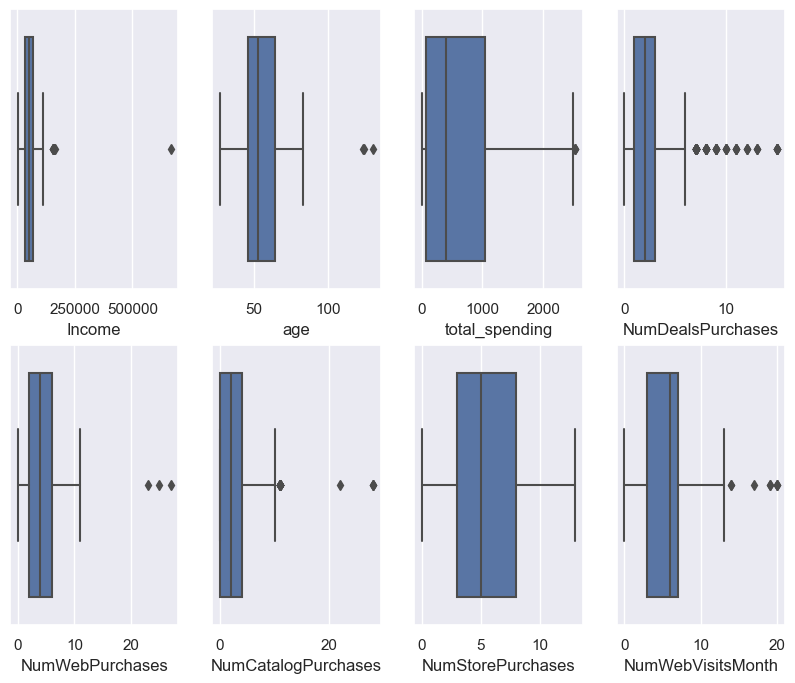

In [34]:
#display the boxplot of those numerical variables altogether
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 4, figsize=(10, 8))

sns.boxplot(data=df, x="Income", ax=axs[0,0])
sns.boxplot(data=df, x="age", ax=axs[0,1])
sns.boxplot(data=df, x="total_spending", ax=axs[0,2])
sns.boxplot(data=df, x="NumDealsPurchases", ax=axs[0,3])
sns.boxplot(data=df, x="NumWebPurchases", ax=axs[1,0])
sns.boxplot(data=df, x="NumCatalogPurchases", ax=axs[1,1])
sns.boxplot(data=df, x="NumStorePurchases", ax=axs[1,2])
sns.boxplot(data=df, x="NumWebVisitsMonth", ax=axs[1,3])

plt.show()

Remove outliers using IQR approach

In [35]:
for col_name in ['Income', 'age', 'total_spending', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']:
  #quartile1
  val_Q1 = np.percentile(df[col_name], 25, interpolation= 'midpoint')

  #quartile3
  val_Q3 = np.percentile(df[col_name], 75, interpolation= 'midpoint')

  #IQR
  val_IQR = val_Q3 - val_Q1
  print("Removing outliers from ", col_name)
  print("Old Data Shape: ", df.shape)
  print("=======")

  # Upper bound
  upper = np.where(df[col_name] >= (val_Q3+1.5*val_IQR))
  # Lower bound
  lower = np.where(df[col_name] <= (val_Q1-1.5*val_IQR))
  
  # Removing the Outliers 
  df.drop(upper[0], inplace = True)
  df.drop(lower[0], inplace = True)
  
  print("New Data Shape: ", df.shape)

  df.reset_index(inplace=True, drop=True)





Removing outliers from  Income
Old Data Shape:  (2216, 36)
New Data Shape:  (2208, 36)
Removing outliers from  age
Old Data Shape:  (2208, 36)
New Data Shape:  (2205, 36)
Removing outliers from  total_spending
Old Data Shape:  (2205, 36)
New Data Shape:  (2202, 36)
Removing outliers from  NumDealsPurchases
Old Data Shape:  (2202, 36)
New Data Shape:  (2058, 36)
Removing outliers from  NumWebPurchases
Old Data Shape:  (2058, 36)
New Data Shape:  (2055, 36)
Removing outliers from  NumCatalogPurchases
Old Data Shape:  (2055, 36)
New Data Shape:  (1990, 36)
Removing outliers from  NumStorePurchases
Old Data Shape:  (1990, 36)
New Data Shape:  (1990, 36)
Removing outliers from  NumWebVisitsMonth
Old Data Shape:  (1990, 36)
New Data Shape:  (1984, 36)


/var/folders/6y/m46bq7nn33x47c0f9z7l5b2h0000gn/T/ipykernel_65167/1014069125.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  val_Q1 = np.percentile(df[col_name], 25, interpolation= 'midpoint')
/var/folders/6y/m46bq7nn33x47c0f9z7l5b2h0000gn/T/ipykernel_65167/1014069125.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  val_Q3 = np.percentile(df[col_name], 75, interpolation= 'midpoint')
/var/folders/6y/m46bq7nn33x47c0f9z7l5b2h0000gn/T/ipykernel_65167/1014069125.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additi

Display the boxplot again

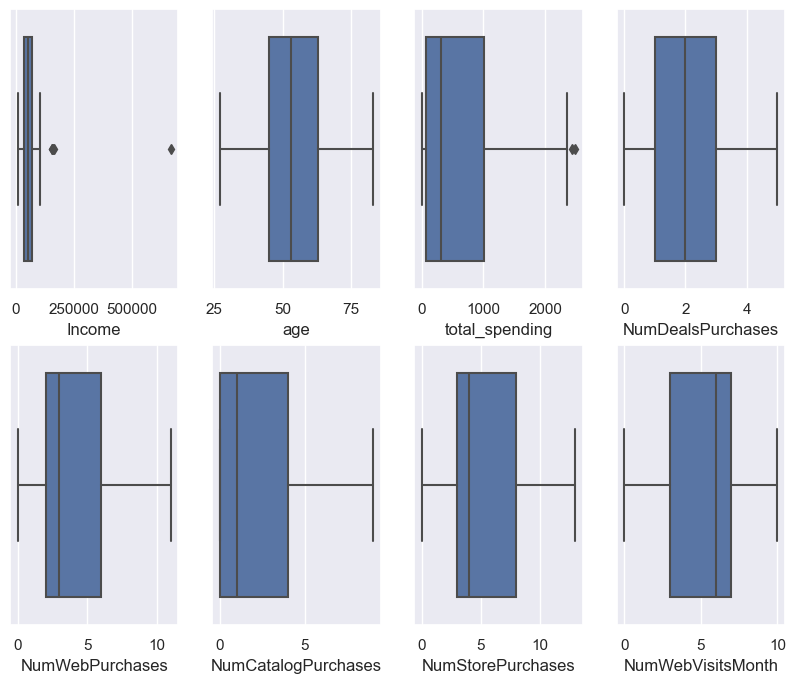

In [36]:
#display the boxplot of those numerical variables altogether
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 4, figsize=(10, 8))

sns.boxplot(data=df, x="Income", ax=axs[0,0])
sns.boxplot(data=df, x="age", ax=axs[0,1])
sns.boxplot(data=df, x="total_spending", ax=axs[0,2])
sns.boxplot(data=df, x="NumDealsPurchases", ax=axs[0,3])
sns.boxplot(data=df, x="NumWebPurchases", ax=axs[1,0])
sns.boxplot(data=df, x="NumCatalogPurchases", ax=axs[1,1])
sns.boxplot(data=df, x="NumStorePurchases", ax=axs[1,2])
sns.boxplot(data=df, x="NumWebVisitsMonth", ax=axs[1,3])

plt.show()

In [37]:
# Filter rows where income < 250000
df = df[df['Income'] < 250000]

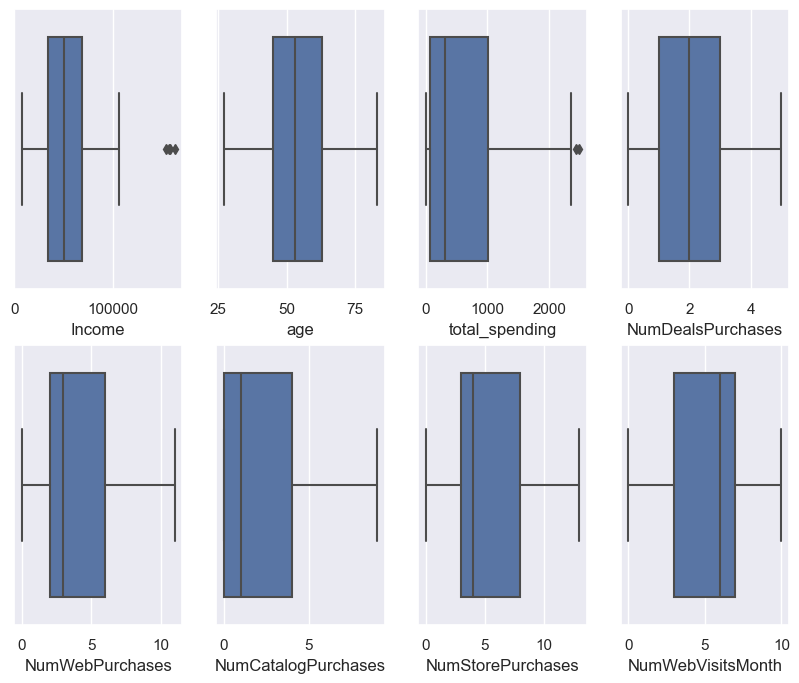

In [38]:
#display the boxplot including other relevant numerical variables altogether
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 4, figsize=(10, 8))

sns.boxplot(data=df, x="Income", ax=axs[0,0])
sns.boxplot(data=df, x="age", ax=axs[0,1])
sns.boxplot(data=df, x="total_spending", ax=axs[0,2])
sns.boxplot(data=df, x="NumDealsPurchases", ax=axs[0,3])
sns.boxplot(data=df, x="NumWebPurchases", ax=axs[1,0])
sns.boxplot(data=df, x="NumCatalogPurchases", ax=axs[1,1])
sns.boxplot(data=df, x="NumStorePurchases", ax=axs[1,2])
sns.boxplot(data=df, x="NumWebVisitsMonth", ax=axs[1,3])

plt.show()

### Check data types of each variables

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 1983
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            1983 non-null   int64         
 1   Year_Birth            1983 non-null   int64         
 2   Education             1983 non-null   object        
 3   Marital_Status        1983 non-null   object        
 4   Income                1983 non-null   float64       
 5   Kidhome               1983 non-null   int64         
 6   Teenhome              1983 non-null   int64         
 7   Dt_Customer           1983 non-null   datetime64[ns]
 8   Recency               1983 non-null   int64         
 9   MntWines              1983 non-null   int64         
 10  MntFruits             1983 non-null   int64         
 11  MntMeatProducts       1983 non-null   int64         
 12  MntFishProducts       1983 non-null   int64         
 13  MntSweetProducts  

In [40]:
df.head()

,CustomerID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,age,weeks_since_joining,months_since_joining,total_spending,marital_status_new,child_new,education_new
0,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,69,496,114,27,0,1,1
1,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,58,524,121,776,1,0,1
2,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,39,499,115,53,1,1,1
3,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,42,503,116,422,1,1,3
4,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,3,11,0,56,521,120,716,1,0,2


In [41]:
df.dtypes

CustomerID                       int64
Year_Birth                       int64
Education                       object
Marital_Status                  object
Income                         float64
Kidhome                          int64
Teenhome                         int64
Dt_Customer             datetime64[ns]
Recency                          int64
MntWines                         int64
MntFruits                        int64
MntMeatProducts                  int64
MntFishProducts                  int64
MntSweetProducts                 int64
MntGoldProds                     int64
NumDealsPurchases                int64
NumWebPurchases                  int64
NumCatalogPurchases              int64
NumStorePurchases                int64
NumWebVisitsMonth                int64
AcceptedCmp3                     int64
AcceptedCmp4                     int64
AcceptedCmp5                     int64
AcceptedCmp1                     int64
AcceptedCmp2                     int64
Complain                 

### Write output 

In [42]:
#write to csv 
df.to_csv('../dataset/processed/marketingcampaign_processed.csv', index=False)

# FIN